<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Intro to `pandas` Review

_Authors: Dave Yerrington (SF), Kiefer Katovich (SF)_

---

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### A. Explore _Mad Men_ Cast Data

---

#### 1. Load the _Mad Men_ cast data into a `pandas` DataFrame.

In [68]:
cast_data_csv = './datasets/mad-men-cast-show-data.csv'

In [69]:
cast_data_df = pd.read_csv(cast_data_csv)

#### 2. Print the head and tail of the data.

In [70]:
cast_data_df.head()
cast_data_df.tail()

,Performer,Show,Show Start,Show End,Status?,CharEnd,Years Since,#LEAD,#SUPPORT,#Shows,Score,Score/Y,lead_notes,support_notes,show_notes
243,Meghan Wolfe,True Detective,2014,PRESENT,LEFT,2014,1,0,0,0,0.00,0,NaN,NaN,NaN
244,Kevin Dunn,True Detective,2014,PRESENT,LEFT,2014,1,0,1,2,2.25,2.25,NaN,"Draft Day, 2014","Veep, Season 3-4"
245,Charles Dance,Game of Thrones,2011,PRESENT,LEFT,2015,0,0,2,1,1.50,#DIV/0!,NaN,"Woman in Gold, 2015; Child 44, 2015","Deadline Gallipoli, Season 1"
246,Patrick Dempsey,Grey's Anatomy,2005,PRESENT,LEFT,2015,0,0,0,0,0.00,#DIV/0!,NaN,NaN,NaN
247,Ian McElhinney,Game of Thrones,2011,PRESENT,LEFT,2015,0,0,0,0,0.00,#DIV/0!,NaN,NaN,NaN


#### 3. Print the columns of the data.

In [71]:
print(cast_data_df.columns)

Index([u'Performer', u'Show', u'Show Start', u'Show End', u'Status?',
       u'CharEnd', u'Years Since', u'#LEAD', u'#SUPPORT', u'#Shows', u'Score',
       u'Score/Y', u'lead_notes', u'support_notes', u'show_notes'],
      dtype='object')


#### 4. Rename any columns with spaces or special characters to not contain any.

In [100]:
# import string
# # the string library has default strings that contain all letters or numbers
# uppercase = string.ascii_uppercase
# lowercase = string.ascii_lowercase

# # Longer way:
# renamed_columns_list = []

# for column in cast_data_df.columns:
#     alnum_column = "".join(char for char in column if char.isalnum())
#     renamed_columns_list.append(alnum_column)
    
# cast_data_df.columns = renamed_columns_list

# Could also use cast_data_dfrename(columns=lambda column: "".join(char for char in column if char.isalnum()))
cast_data_df.rename(columns=lambda column: "".join(char for char in column if char.isalnum()))

# Check:
cast_data_df.head()

,Performer,Show,ShowStart,ShowEnd,Status,CharEnd,YearsSince,LEAD,SUPPORT,Shows,Score,ScoreY,leadnotes,supportnotes,shownotes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,0,0,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,0,1,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."
2,LisaGay Hamilton,The Practice,1997,2014,END,2003,12,2,0,2,4.00,0.333333333,"Life of a King, 2014; Go For Sisters, 2013",NaN,"Men of a Certain Age, Season 1-2"
3,Lara Flynn Boyle,The Practice,1997,2014,END,2003,12,0,0,0,0.00,0,NaN,NaN,NaN
4,Dylan McDermott,The Practice,1997,2014,END,2004,11,2,7,6,9.75,0.886363636,"Olympus Has Fallen, 2013; Freezer, 2014","The Messengers, 2007; Unbeatable Harold, 2009;...","Big Shots, Season 1; Dark Blue, Season 1-2; Am..."


#### 5. Subset the data where the status of the show is not "END" or "End."

In [73]:
status_subset_df = cast_data_df[(cast_data_df["Status"] != "END") & (cast_data_df["Status"] != "End")]

#### 6. Print out the performers where the show start is greater than 2005 and the score is greater than 7.

In [74]:
# double checking out dtypes to make sure they are correct.
performers = cast_data_df[(cast_data_df["ShowStart"] > 2005) & (cast_data_df["Score"] > 7)]["Performer"]
print(performers)
# performers is a series, not a dataframe -- should I convert it to a list instead?

95         Scott Porter
132      Connie Britton
149     Amanda Seyfried
157    Siobhan Finneran
Name: Performer, dtype: object


#### 7. Select the performer and show column for the 20th-25th LABELED rows.

In [75]:
selected_rows_df = cast_data_df.loc[20:25, ["Performer", "Show"]]
print(selected_rows_df)

             Performer             Show
20    Mary Steenburgen  Joan of Arcadia
21  Mathew St. Patrick   Six Feet Under
22       Michael Welch  Joan of Arcadia
23    Aaron Himelstein  Joan of Arcadia
24     Becky Wahlstrom  Joan of Arcadia
25     Chris Marquette  Joan of Arcadia


#### 8. Plot a histogram of score.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f061790>]],
      dtype=object)

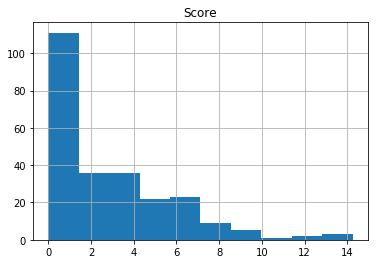

In [76]:
cast_data_df.hist('Score')

### B. Explore San Francisco Crime Data

--- 

**9. Load the San Francisco crime data set into a DataFrame.**

In [77]:
crime_csv = './datasets/sf_crime.csv'

In [86]:
crime_df = pd.read_csv(crime_csv)

crime_df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2003-03-23 23:27:00,ARSON,ARSON OF A VEHICLE,Sunday,BAYVIEW,NONE,0 Block of HUNTERS PT EXPWY EX,-122.376945,37.733018
1,2006-03-07 06:45:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,0 Block of MARINA BL,-122.432952,37.805052
2,2004-03-06 03:00:00,NON-CRIMINAL,LOST PROPERTY,Saturday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421
3,2011-12-03 12:10:00,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,TARAVAL,"ARREST, BOOKED",3200 Block of 20TH AV,-122.475647,37.728528
4,2003-01-10 00:15:00,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Friday,NORTHERN,NONE,POLK ST / BROADWAY ST,-122.421772,37.795946


**10. Look at the dimensions of the crime data.**

In [79]:
crime_df.shape

(25000, 9)

**11. Look at the data types of the columns and print out the column names.**

In [83]:
crime_df.info()
# print(crime_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
Dates         25000 non-null object
Category      25000 non-null object
Descript      25000 non-null object
DayOfWeek     25000 non-null object
PdDistrict    25000 non-null object
Resolution    25000 non-null object
Address       25000 non-null object
X             25000 non-null float64
Y             25000 non-null float64
dtypes: float64(2), object(7)
memory usage: 1.7+ MB


**12. How many distinct districts are there?**

In [84]:
crime_df["PdDistrict"].unique()

array(['BAYVIEW', 'NORTHERN', 'SOUTHERN', 'TARAVAL', 'MISSION',
       'INGLESIDE', 'CENTRAL', 'TENDERLOIN', 'RICHMOND', 'PARK'],
      dtype=object)

**13. Which day of the week has the most crime?**

In [98]:
crime_df.mode().loc[0, "DayOfWeek"]

'Friday'

#### 14. Make a new DataFrame featuring the crime categories and the number of crimes per category.

In [107]:
crime_df.groupby("Category")["Category"].agg(len).sort_values(ascending=False)

Category
LARCENY/THEFT                  4934
OTHER OFFENSES                 3656
NON-CRIMINAL                   2601
ASSAULT                        2164
DRUG/NARCOTIC                  1533
VEHICLE THEFT                  1506
VANDALISM                      1280
WARRANTS                       1239
BURGLARY                       1023
SUSPICIOUS OCC                  891
MISSING PERSON                  771
ROBBERY                         630
FRAUD                           537
SECONDARY CODES                 283
FORGERY/COUNTERFEITING          281
WEAPON LAWS                     255
PROSTITUTION                    223
TRESPASS                        209
STOLEN PROPERTY                 137
SEX OFFENSES FORCIBLE           120
DRUNKENNESS                     105
DISORDERLY CONDUCT              105
RECOVERED VEHICLE                80
DRIVING UNDER THE INFLUENCE      75
KIDNAPPING                       71
RUNAWAY                          58
ARSON                            52
LIQUOR LAWS        

**15. Make a DataFrame that includes the districts and crime counts per district. Which district has the most crime?**

*Hint: You can use the `.sort_values()` function to sort your DataFrame by column.*

In [108]:
crime_df.groupby("PdDistrict")["PdDistrict"].agg(len).sort_values(ascending=False)

# The "SOUTHERN" district has the most crime.

PdDistrict
SOUTHERN      4413
MISSION       3416
NORTHERN      3076
BAYVIEW       2555
CENTRAL       2424
TENDERLOIN    2336
INGLESIDE     2256
TARAVAL       1804
PARK          1438
RICHMOND      1282
Name: PdDistrict, dtype: int64